# Loading the Data

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt
#load mnist dataset
(X_train_loaded, y_train_loaded), (X_test_loaded, y_test_loaded) = mnist.load_data()

Using TensorFlow backend.


Zahl:  0


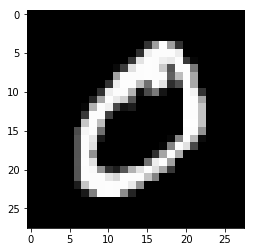

In [2]:
plt.gray()
plt.imshow(X_train_loaded[1])
print("Zahl: ",y_train_loaded[1])

In [3]:
X_train = X_train_loaded.reshape(X_train_loaded.shape[0], 28, 28, 1)
X_test = X_test_loaded.reshape(X_test_loaded.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [4]:
number_of_classes = 10
y_train = keras.utils.to_categorical(y_train_loaded, num_classes=number_of_classes)
y_test = keras.utils.to_categorical(y_test_loaded, num_classes=number_of_classes)

In [5]:
input_shape = X_train[1].shape
print(input_shape)
print(X_train.shape)

(28, 28, 1)
(60000, 28, 28, 1)


In [6]:
model = Sequential()
model.add(Convolution2D(24, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Convolution2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
#model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(450,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(300,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(150,activation = "relu"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s - loss: 0.2182 - acc: 0.9310 - val_loss: 0.0495 - val_acc: 0.9834
Epoch 2/15
60000/60000 [==============================] - 5s - loss: 0.0713 - acc: 0.9781 - val_loss: 0.0335 - val_acc: 0.9877
Epoch 3/15
60000/60000 [==============================] - 5s - loss: 0.0560 - acc: 0.9824 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 4/15
60000/60000 [==============================] - 5s - loss: 0.0457 - acc: 0.9854 - val_loss: 0.0273 - val_acc: 0.9909
Epoch 5/15
60000/60000 [==============================] - 5s - loss: 0.0383 - acc: 0.9875 - val_loss: 0.0243 - val_acc: 0.9923
Epoch 6/15
60000/60000 [==============================] - 5s - loss: 0.0329 - acc: 0.9898 - val_loss: 0.0234 - val_acc: 0.9925
Epoch 7/15
60000/60000 [==================

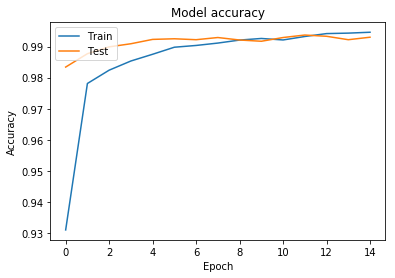

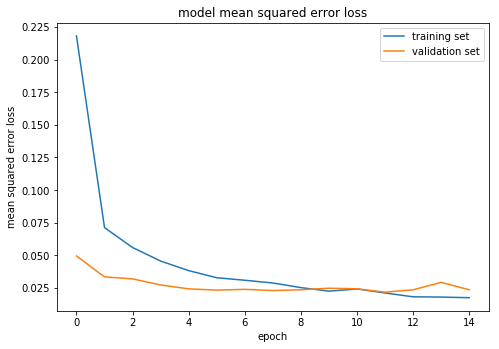

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",   #adadelta
              metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size = 128, epochs = 15, verbose = 1,shuffle = True, validation_data =(X_test, y_test))
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### plot the training and validation loss for each epoch
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(history.history['loss'])
axes.plot(history.history['val_loss'])
axes.set_title('model mean squared error loss')
axes.set_ylabel('mean squared error loss')
axes.set_xlabel('epoch')
axes.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [62]:
model.save('mnist_v1.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

## Predictions

In [3]:
import os

In [14]:
import numpy as np
import cv2
import os
import glob
img_dir = "Test_numbers/" 
data_path = os.path.join(img_dir,'*.jpg')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    img =cv2.resize(img,(28,28)) #resize
    img = cv2.bitwise_not(img) #invert color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = img[:, :, np.newaxis]
    img = img/255.
    #img = np.resize(img,(28,28,1))
    data.append(np.asarray(img,dtype = np.float32))

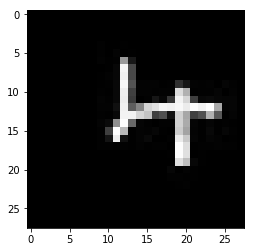

In [15]:
plt.imshow(data[1],cmap = "gray")

In [8]:
import random
random.sample(range(0, len(X_train)), 9)

[16643, 56964, 3367, 23263, 15231, 45350, 448, 32826, 38069]

In [51]:
data[1].shape

(28, 28, 1)

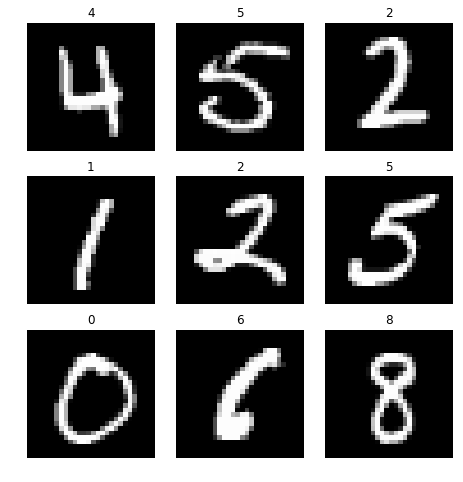

In [11]:
%matplotlib inline

def get_label(label):
    return list(label).index(1) #or: np.where(label ==1)



def model_prediction(l):
    predictions = []
    for i in l:
        pred = model.predict(X_train[i])
        predictions.append(pred)
        
    return predictions

index_list = random.sample(range(0, len(X_train)), 9)
fig, axes = plt.subplots(3,3, figsize=(8, 8))
fig.subplots_adjust(hspace = .2, wspace=.001)
axes = axes.ravel()
for i in range(9):
    index = index_list[i]
    img = X_train_loaded[index]
    axes[i].axis('off')
    axes[i].imshow(img)
    axes[i].set_title(get_label(y_train[index]))

# TODO: 

- gather 9 pred images 
- crop them to 28,28 format and normalize them
- try predictions!